# Introducció a la pràctica 1: primers passos

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


### Jupyter Notebook

Aquest ``jupyter notebook`` està compost de blocs de text i codi, recordeu que hi ha blocs de codi que depenen de que blocs anteriors hagin estat executats. 

El codi d'aquest notebook és modificable i us recomanem que feu canvis i en comproveu els resultats.

**Per a executar el notebook: cal que instal.leu [jupyter notebook](http://jupyter.readthedocs.io/en/latest/install.html).**


### Guia d'instal.lació de les llibreries


És molt recomanable que utilitzeu Linux, ja que agilitza la instal.lació de les llibreries. També es recomana utilitzar **Anaconda**, una distribucó de python multiplataforma que permet instal.lar llibreries fàcilment i l'IDE d'spyder o PyCharm.

Donat que teniu conda o pypi (pip) (aquest segon es pot instal.lar amb ``apt-get``), heu d'instal.lar els següents paquets (exemple en pypi):

```
sudo pip install numpy
sudo pip install scikit-learn
sudo pip install matplotlib
sudo pip install scipy
```

En el cas d'Anaconda, substituir ``sudo pip`` per ``conda``.

En el cas del matplotlib, si us dona errors en Ubuntu Linux (`FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'`), cal instal·lar el paquet `texlive-full` (`sudo apt install texlive-full`) que ocupa 3-4GB. Si només ho voleu per aquesta pràctica, podeu provar amb el `textlive-base` (uns 100MB)


# Apartat (C): Analitzant Dades

L'objectiu d'aquest primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.

Ara podeu veure un exemple amb una base de dades **dummy** que creem nosaltres mateixos:

In [138]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('measurements.csv')
data = dataset.values
x = data[:,:]
y = data[:,1]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (388, 12)
Dimensionalitat de les entrades X (388, 12)
Dimensionalitat de l'atribut Y (388,)


Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per a treure'ls, podeu fer: ``dades[np.isnan(dades)] = valor``. Podeu mirar com afecten diferents estratègies d'assignar ``valor``. Per exemple, pot ser 0, la mitja, la mediana, .... També podeu analitzar si hi ha algun atribut perdut (que té molts valors no existents) i valorar si eliminar directament l'atribut.

Hi ha vegades que el fitxer .csv utilitza una coma ',' en comptes d'un punt decimal '.', fent que cada atribut sigui considerat com un ``string``. Per tant, a part d'eliminar les files (mostres) que continguin ``NaN``, cal convertir les ',' a '.' per a poder convertir els valors a ``float``.
`dtype=object`
A més, utilitzeu la llibreria pandas, i no `np.genfromtxt()` ja que llegeix només valors numèrics, i els NaN els converteix a string. Si esteu empenyats en utilitzar `np.genfromtxt()`, caldrà posar-li com a paràmetre 

In [139]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

#Cambiamos el nombre de nuestras columnas para cuando tengamos que tratar con sus datos evitando los espacios en ellos
dataset = dataset.rename(columns={"refill liters":"refill_liters"})
dataset = dataset.rename(columns={"refill gas":"refill_gas"})

#Reemplazamos las ',' de nuestras columnas por '.'
dataset = dataset.replace(',','.', regex=True)

dataset['distance'] = dataset['distance'].astype(float)
dataset['consume'] = dataset['consume'].astype(float)
dataset['speed'] = dataset['speed'].astype(float)
dataset['temp_inside'] = dataset['temp_inside'].astype(float)
dataset['temp_outside'] = dataset['temp_outside'].astype(float)


Per comptar el nombre de valors no existents:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [140]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.000,5.000,26.000,21.500,12.000,NaN,E10,0,0,0,45,E10
1,12.000,4.200,30.000,21.500,13.000,NaN,E10,0,0,0,NaN,NaN
2,11.200,5.500,38.000,21.500,15.000,NaN,E10,0,0,0,NaN,NaN
3,12.900,3.900,36.000,21.500,14.000,NaN,E10,0,0,0,NaN,NaN
4,18.500,4.500,46.000,21.500,15.000,NaN,E10,0,0,0,NaN,NaN


Mostrarem diferents càlculs amb les nostres dades, entre ells el màxim, minim, desviació standard...  
Primerament realitzarem una copia del nostre dataset per a tractar les dades, una vegada tenim la copia reemplacem les comes (',') que hi ha a les nostres columnes per punts ('.') per tal de poder assignar el tipus float que volem als seus valors.  
I mostrarem els càlculs que realitza la funció de la llibreria pandas `pd.describe()`.

In [141]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000,388.000,388.000,376.000,388.000,388.000,388.000,388.000
mean,19.653,4.912,41.928,21.930,11.358,0.077,0.124,0.082
std,22.668,1.033,13.599,1.010,6.992,0.267,0.330,0.275
min,1.300,3.300,14.000,19.000,-5.000,0.000,0.000,0.000
25%,11.800,4.300,32.750,21.500,7.000,0.000,0.000,0.000
50%,14.600,4.700,40.500,22.000,10.000,0.000,0.000,0.000
75%,19.000,5.300,50.000,22.500,16.000,0.000,0.000,0.000
max,216.100,12.200,90.000,25.500,31.000,1.000,1.000,1.000


#### Calculem la T-Statistic
Amb aquest càlcul podrem analitzar quins atributs tenen més correlació amb el consum del cotxe

Com podem veure en les nostres dades els atributs 'temp_inside', 'specials', 'refill_liters' i 'refill_gas' contenen valors NaN per tant comprobarem quin valors diferents tenen.

In [142]:
#Realizamos una copia de la base de datos para no generar posibles cambios
df = dataset.copy(deep=True)
print("Valors unics temp_inside: ", df['temp_inside'].unique(), "\n")
print("Valors unics specials: ", df['specials'].unique(), "\n")
print("Valors unics refill_liters: ", df['refill_liters'].unique(), "\n")
print("Valors unics refill_gas: ", df['refill_gas'].unique(), "\n")

Valors unics temp_inside:  [21.5 22.5 20.   nan 21.  20.5 23.  23.5 25.  24.  22.  19.  24.5 25.5] 

Valors unics specials:  [nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain'] 

Valors unics refill_liters:  ['45' nan '37.6' '37.7' '38' '38.3' '10' '39' '41' '37' '37.2'] 

Valors unics refill_gas:  ['E10' nan 'SP98'] 



Com podem veure per al cas del 'temp_inside' podem substituïr els valors nan per la mitjana dels seus altres valors i obtenir un cas més adequat per als seus valors.  
En el cas dels 'specials' aquests valors es poden veure reflexats en altres atributs i al tenir una quantitat tant elevada de valors nan ens podem desfer d'ells.
Per als atributs de refill podem observar que la quantitat de valors nan és massa elevada com per a tenir en compte aquells que no ho són per tant directament eliminarem els camps de la nostra base de dades.

In [143]:
#Eliminem les columnes comentades anteriorment
df.drop(['specials'], inplace=True, axis=1)
df.drop(['refill_liters'], inplace=True, axis=1)
df.drop(['refill_gas'], inplace=True, axis=1)

#Substituïm els valors de temp_inside
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())
print("Nan en la nueva base de datos:\n",df.isnull().sum(), "\n")
print(df.head())

Nan en la nueva base de datos:
 distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64 

   distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  sun
0    28.000    5.000 26.000       21.500        12.000      E10   0     0    0
1    12.000    4.200 30.000       21.500        13.000      E10   0     0    0
2    11.200    5.500 38.000       21.500        15.000      E10   0     0    0
3    12.900    3.900 36.000       21.500        14.000      E10   0     0    0
4    18.500    4.500 46.000       21.500        15.000      E10   0     0    0


<IPython.core.display.Javascript object>


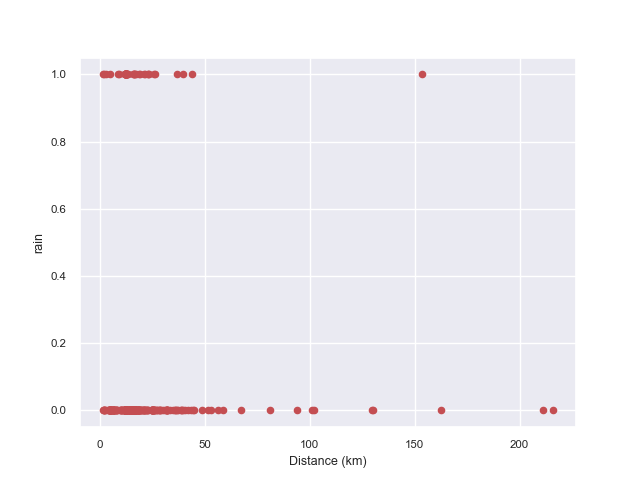

In [144]:
ax = df.plot(kind='scatter', x='distance', y='rain', color='r')   
plt.xlabel("Distance (km)")
plt.ylabel("rain")
plt.show()

<IPython.core.display.Javascript object>


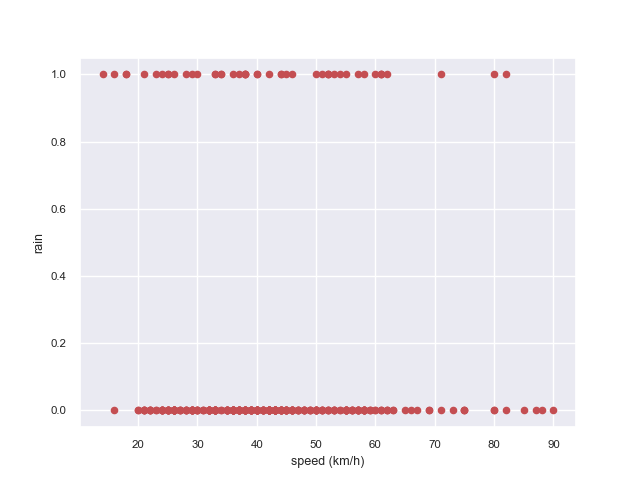

In [145]:
ax = df.plot(kind='scatter', x='speed', y='rain', color='r')   
plt.xlabel("speed (km/h)")
plt.ylabel("rain")
plt.show()

<IPython.core.display.Javascript object>


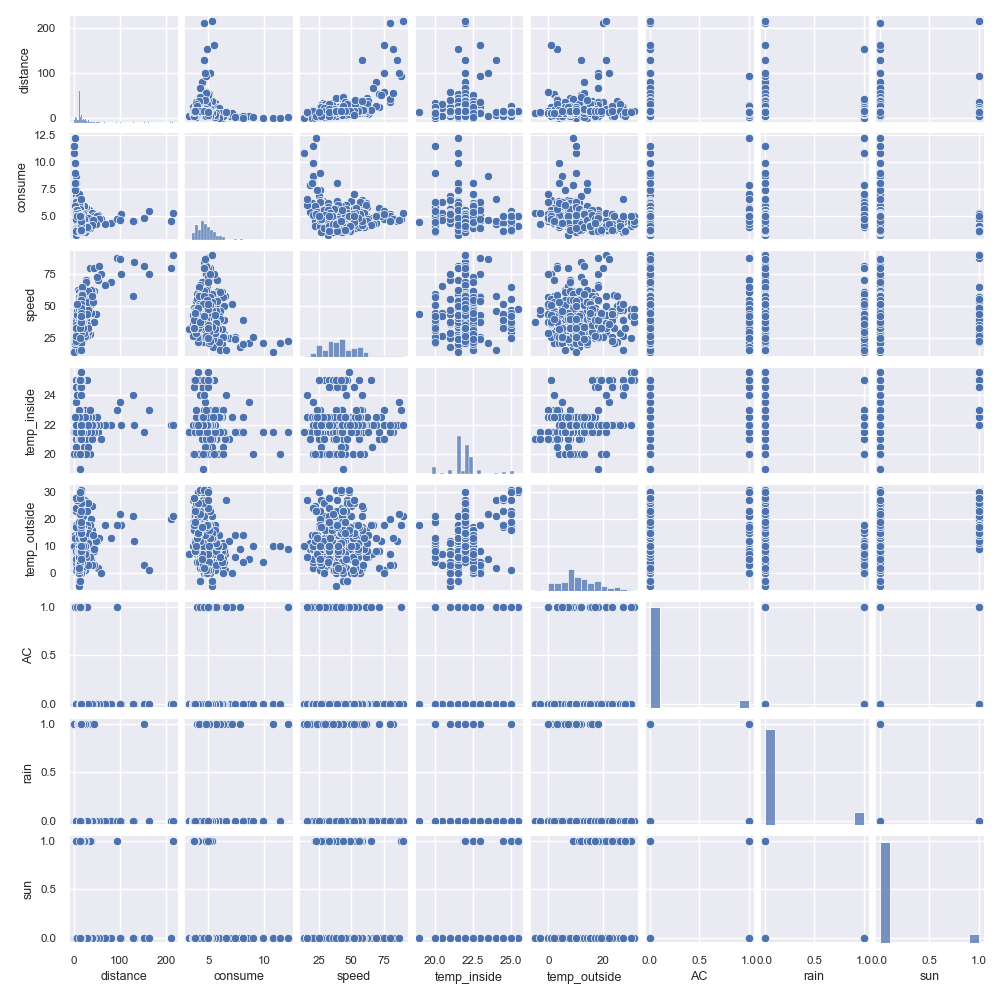

In [146]:
import seaborn as sns

ax = sns.pairplot(df, height=1.25)

#### Distribució consum gasolina

<IPython.core.display.Javascript object>


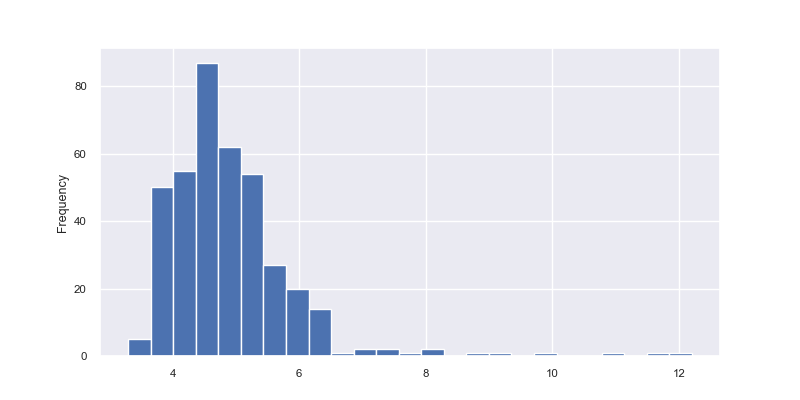

In [147]:
plt.figure() 
df['consume'].plot.hist(bins=25,figsize=(8,4)) 
plt.show() 

<IPython.core.display.Javascript object>


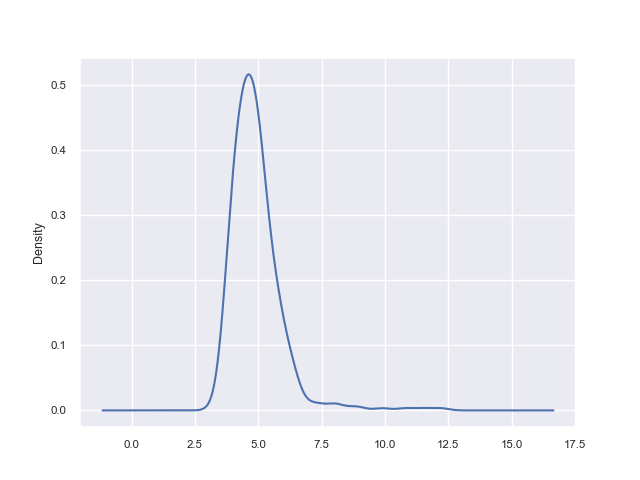

In [148]:
plt.figure()
df['consume'].plot.density()
plt.show()

#### Distribució distància recorreguda

<IPython.core.display.Javascript object>


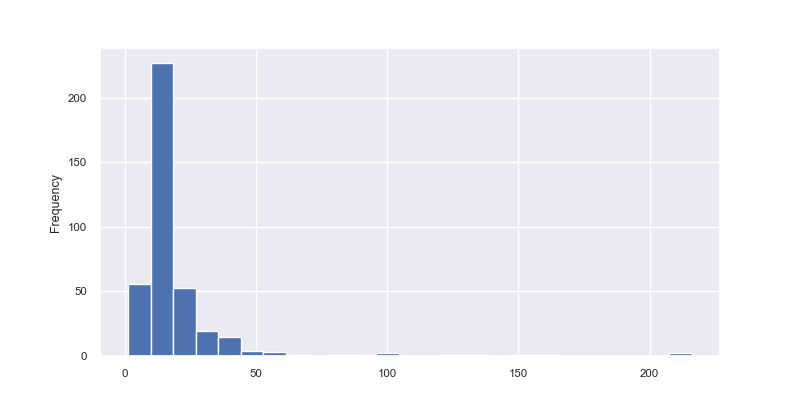

In [149]:
plt.figure()
df['distance'].plot.hist(bins=25,figsize=(8,4))
plt.show()

<IPython.core.display.Javascript object>


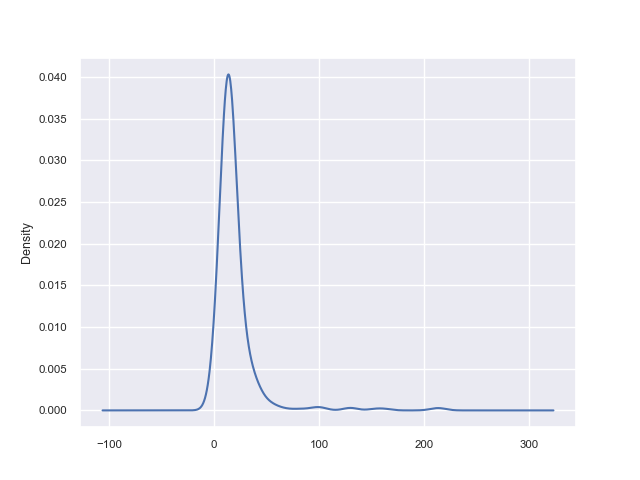

In [150]:
plt.figure()
df['distance'].plot.density()
plt.show()

## Retallem les nostres dades

Eliminem aquells casos en els quals algun dels seus valors de distància o consum són exagerats ja que com podem observar la dispersió dels seus valors pot produir incomprensions en les distribucions

In [151]:
df_valores_agrupados = df.copy(deep=True)
df_valores_agrupados = df_valores_agrupados.loc[(df_valores_agrupados['consume'] <= 5.30) & (df_valores_agrupados['distance'] <= 28.30)]

#ax = sns.pairplot(df_valores_agrupados, height=1.25)

### Matriu de correlació entre les nostres dades inicials

<IPython.core.display.Javascript object>


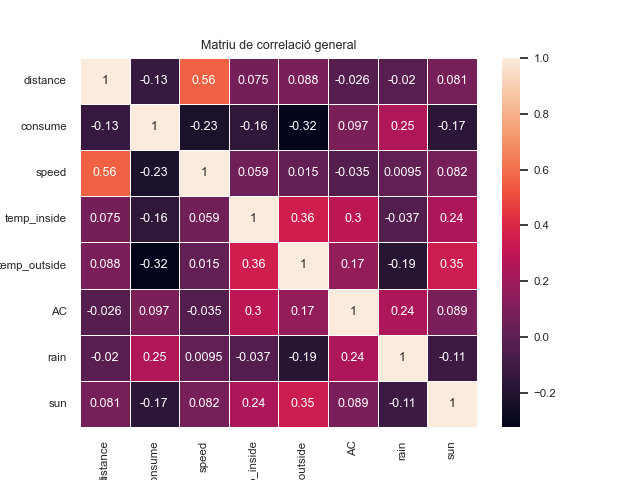

Text(0.5, 1.0, 'Matriu de correlació general')

In [152]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = df.corr()

plt.figure() 
sns.set(font_scale=.75)
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
ax.set_title("Matriu de correlació general")

Quina seria la nostra matriu de correlació segons el tipus de gasolina que tenim? Té alguna infuéncia en els valors?

In [153]:
#Que tipos de gasolina tenemos
print(dataset['gas_type'].unique())

['E10' 'SP98']


Una vegada sabem els tipus de gasolina que tenim, separem la base de dades en dos subgrups depenent del seu tipus.

In [154]:
#Instrucción para que el display del describe se haga en una sola línea
pd.set_option('display.width', 1000)

#Gasolina E10
print("\033[1mValors Gasolina E10: \033[0m\n")
df_E10 = df.copy()
df_E10 = df_E10.loc[df_E10['gas_type'] == 'E10']
df_E10.drop(['gas_type'], inplace=True, axis=1)
print(df_E10.describe())
print("\n")
#Gasolina SP98
print("\033[1mValors Gasolina SP98: \033[0m\n")
df_SP98 = df.copy()
df_SP98 = df_SP98.loc[df_SP98['gas_type'] == 'SP98']
df_SP98.drop(['gas_type'], inplace=True, axis=1)
print(df_SP98.describe())
print("\n")

#Devolvemos la opción del display a su valor natural
pd.set_option('display.width', None)

Valors Gasolina E10: 

       distance  consume   speed  temp_inside  temp_outside      AC    rain     sun
count   160.000  160.000 160.000      160.000       160.000 160.000 160.000 160.000
mean     21.096    4.931  43.506       21.917        10.119   0.044   0.100   0.075
std      20.307    0.901  14.078        0.654         6.392   0.205   0.301   0.264
min       1.700    3.700  14.000       21.000        -5.000   0.000   0.000   0.000
25%      12.075    4.400  35.000       21.500         6.000   0.000   0.000   0.000
50%      15.400    4.800  42.000       21.500         9.000   0.000   0.000   0.000
75%      21.200    5.300  51.000       22.500        14.250   0.000   0.000   0.000
max     130.300   10.800  88.000       25.000        27.000   1.000   1.000   1.000


Valors Gasolina SP98: 

       distance  consume   speed  temp_inside  temp_outside      AC    rain     sun
count   228.000  228.000 228.000      228.000       228.000 228.000 228.000 228.000
mean     18.640    4.899  4

Quants cotxes tenim per a cada tipus de gasolina?

In [155]:
print("Cotxes gasolina E10: ", df_E10.shape[0])
print("\nCotxes gasolina sp98: ", df_SP98.shape[0])

Cotxes gasolina E10:  160

Cotxes gasolina sp98:  228


<IPython.core.display.Javascript object>


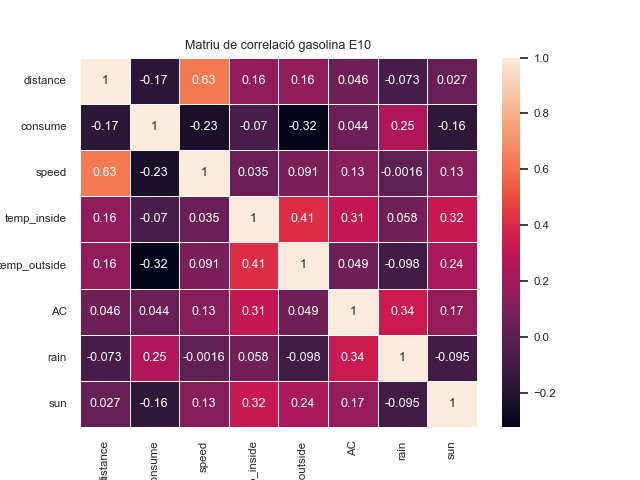

<IPython.core.display.Javascript object>


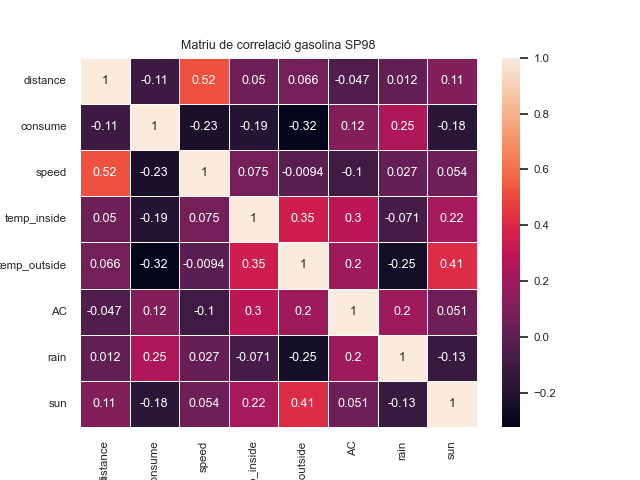

In [156]:
sns.set(font_scale=.75)

plt.figure()
correlacio_E10 = df_E10.corr()
ax1 = sns.heatmap(correlacio_E10, annot=True, linewidths=.5, )
ax1.set_title("Matriu de correlació gasolina E10")
plt.show()


plt.figure()
correlacio_SP98 = df_SP98.corr()
ax2 = sns.heatmap(correlacio_SP98, annot=True, linewidths=.5)
ax2.set_title("Matriu de correlació gasolina SP98")
plt.show()


Així doncs ara podreu respondre a les següents preguntes:

1. Quin és el tipus de cada atribut? 
2. Quins atributs tenen una distribució Guassiana?
3. Quin és l'atribut objectiu? Per què?

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació se us dona una funció auxiliar per a calcular l'error quadràtic mitjà:

**Dividim la nostra base de dades entre train i test**

In [157]:
label_columns = list(df.columns)
len_feature = len(label_columns)

**Posem tots los valors a X_df menys strings i el consum i a Y_df posem el preu**

In [158]:
X_df = df[label_columns[0:len_feature]]
X_df = X_df.drop('gas_type', axis=1)
X_df = X_df.drop('consume', axis=1)
Y_df = df[label_columns[1]]
print("Feature set size:",X_df.shape)
print("Variable set size:",Y_df.shape)

Feature set size: (388, 7)
Variable set size: (388,)


In [159]:
X_df.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun
0,28.000,26.000,21.500,12.000,0,0,0
1,12.000,30.000,21.500,13.000,0,0,0
2,11.200,38.000,21.500,15.000,0,0,0
3,12.900,36.000,21.500,14.000,0,0,0
4,18.500,46.000,21.500,15.000,0,0,0


In [160]:
Y_df.head()

0   5.000
1   4.200
2   5.500
3   3.900
4   4.500
Name: consume, dtype: float64

### Separem train y test

**Utilitzem la funció `train_test_split` de la llibreria `sklearn`**

In [287]:
from sklearn.model_selection import train_test_split
#Creamos las variables y las separaciones en una sola línea de comando
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=123)

**Comprovem els tamanys de les nostres variables test i train**

In [288]:
print("Tamany X training:\t",X_train.shape)
print("Tamany X test:\t\t",X_test.shape)
print("Tamany Y training:\t",y_train.shape)
print("Tamany Y test:\t\t",y_test.shape)

Tamany X training:	 (271, 7)
Tamany X test:		 (117, 7)
Tamany Y training:	 (271,)
Tamany Y test:		 (117,)


### Entrenar les dades del training

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()

**Entrenem el model amb les dades inicialitzades**

In [290]:
lr.fit(X_train,y_train)

LinearRegression()

**Comprovem l'intercepció i els coeficients del nostre model i els posem a la base de dades**

In [291]:
print("Intercepció del model lineal:", lr.intercept_)
print("\nCoeficients del model lineal:", lr.coef_)

Intercepció del model lineal: 7.816443088772434

Coeficients del model lineal: [ 0.0048328  -0.02469856 -0.07403904 -0.0415086   0.61871167  0.55579491
 -0.15900624]


In [292]:
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=["Coeficients"])
cdf

,Coeficients
distance,0.005
speed,-0.025
temp_inside,-0.074
temp_outside,-0.042
AC,0.619
rain,0.556
sun,-0.159


**Calculem la t-statistic i el Standard Error**

In [293]:
n=X_train.shape[0]
k=X_train.shape[1]
print(range(k))
dfN = n-k
train_pred=lr.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coeficients']/cdf['Standard Error']
cdf

range(0, 7)


,Coeficients,Standard Error,t-statistic
distance,0.005,0.003,1.899
speed,-0.025,0.004,-5.566
temp_inside,-0.074,0.055,-1.343
temp_outside,-0.042,0.008,-4.952
AC,0.619,0.210,2.940
rain,0.556,0.167,3.320
sun,-0.159,0.210,-0.755


**Segons aquests valors quins són aquells que tenen més importància per predir el consum**

In [294]:
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

rain > 
AC > 
distance > 
sun > 
temp_inside > 
temp_outside > 
speed


**Conjunt de scatter plots amb el consum**

<IPython.core.display.Javascript object>


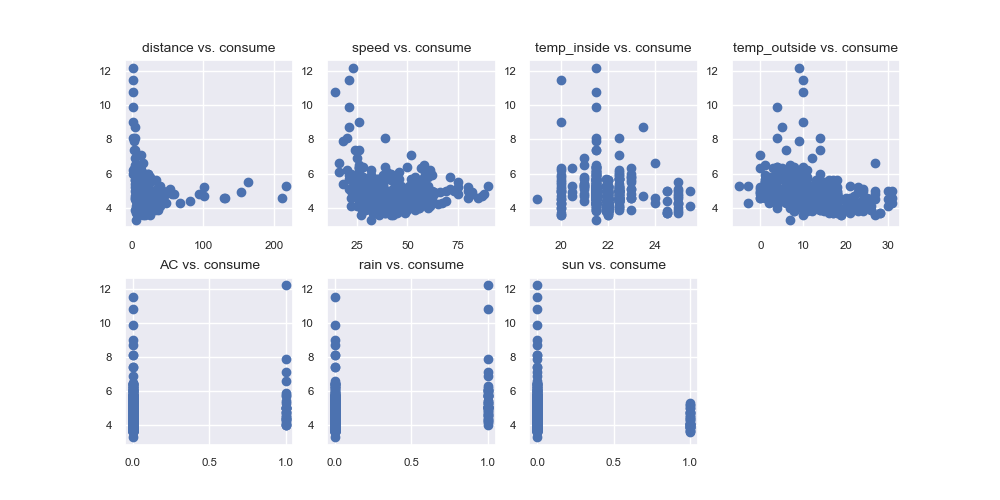

Text(0.5, 1.0, 'sun vs. consume')

In [295]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2,4)
gs.hspace = .3

ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['consume'])
ax0.set_title(l[0]+" vs. consume", fontdict={'fontsize':10})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['consume'])
ax1.set_title(l[1]+" vs. consume",fontdict={'fontsize':10})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['consume'])
ax2.set_title(l[2]+" vs. consume",fontdict={'fontsize':10})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['consume'])
ax3.set_title(l[3]+" vs. consume",fontdict={'fontsize':10})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['consume'])
ax4.set_title(l[4]+" vs. consume",fontdict={'fontsize':10})

ax5 = plt.subplot(gs[5])
ax5.scatter(df[l[5]],df['consume'])
ax5.set_title(l[5]+" vs. consume",fontdict={'fontsize':10})

ax6 = plt.subplot(gs[6])
ax6.scatter(df[l[6]],df['consume'])
ax6.set_title(l[6]+" vs. consume",fontdict={'fontsize':10})

**R-squared del ajust del model**

In [296]:
print("Valor R-squared:",round(metrics.r2_score(y_train,train_pred),5))

Valor R-squared: 0.25088


### Predicció, error estimat i matrius de regressió

In [297]:
prediccions = lr.predict(X_test)
print(X_test)

     distance  speed  temp_inside  temp_outside  AC  rain  sun
223    24.800 56.000       22.500        11.000   0     0    0
313    11.300 38.000       22.000        17.000   0     0    0
302    16.600 46.000       22.000         5.000   1     0    0
249    12.500 57.000       22.500        16.000   0     0    1
378    16.200 39.000       24.500        17.000   1     0    0
..        ...    ...          ...           ...  ..   ...  ...
241    17.400 36.000       22.500        12.000   0     0    1
276    16.100 32.000       22.000        19.000   0     0    0
212    13.400 31.000       20.000         9.000   0     0    0
162    53.200 71.000       21.500         2.000   0     0    0
105    22.900 45.000       20.500         7.000   0     0    0

[117 rows x 7 columns]


**Predicció utilitzant el model lineal**

**Scatter plot de la nostra predicció del consum i el y_test**

<IPython.core.display.Javascript object>


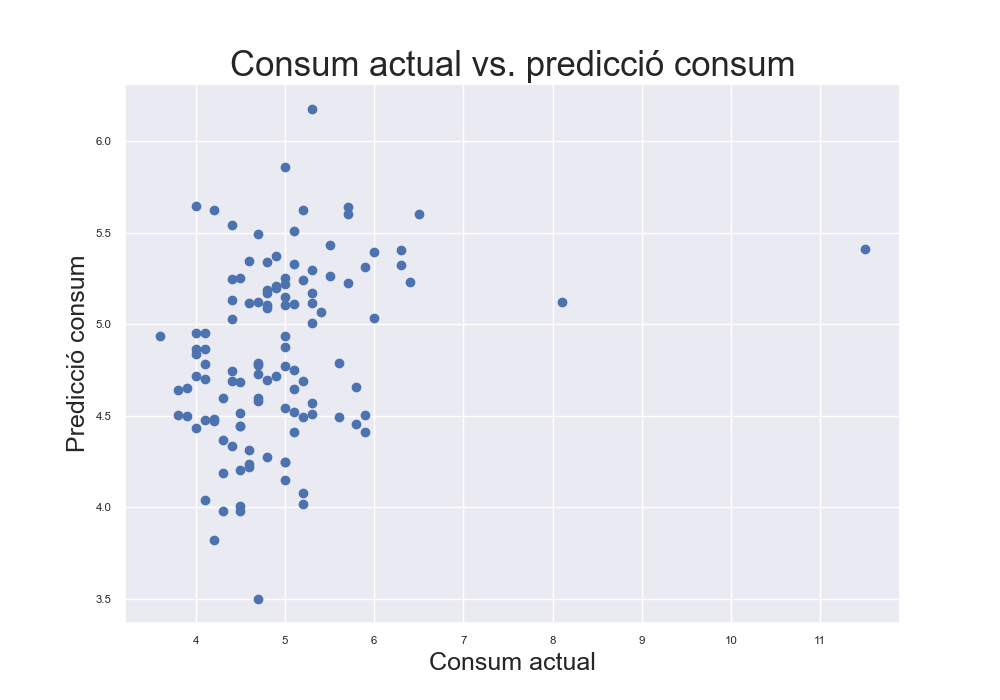

In [298]:
plt.figure(figsize=(10,7))
plt.title("Consum actual vs. predicció consum",fontsize=25)
plt.xlabel("Consum actual",fontsize=18)
plt.ylabel("Predicció consum", fontsize=18)
plt.scatter(x=y_test,y=prediccions)

<IPython.core.display.Javascript object>


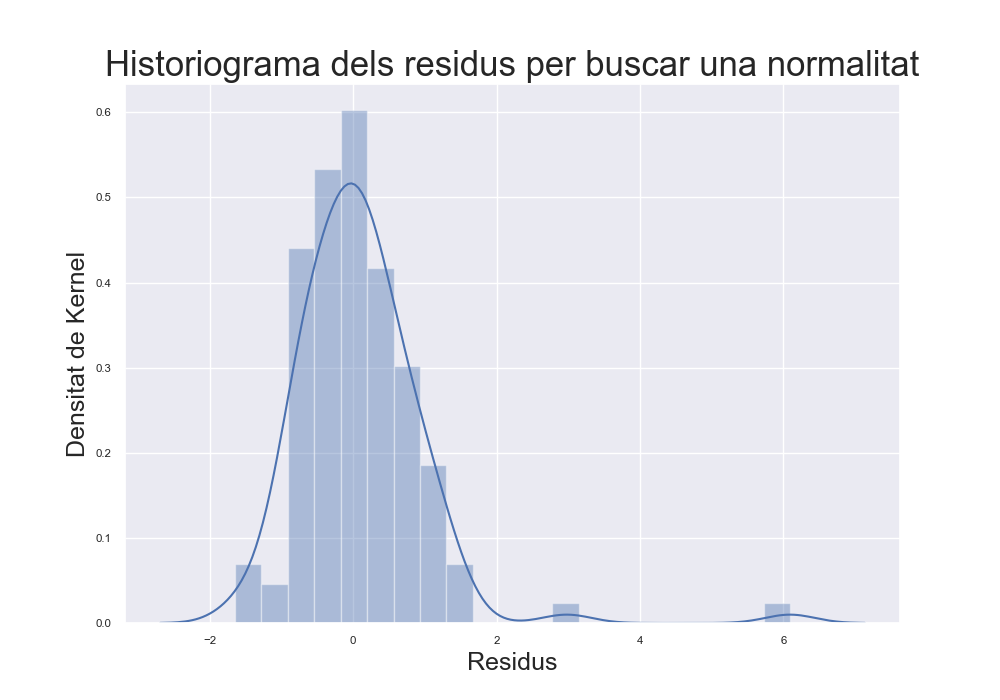

In [299]:
plt.figure(figsize=(10,7))
plt.title("Historiograma dels residus per buscar una normalitat",fontsize=25)
plt.xlabel("Residus",fontsize=18)
plt.ylabel("Densitat de Kernel", fontsize=18)
ax = sns.distplot([y_test-prediccions])

<IPython.core.display.Javascript object>


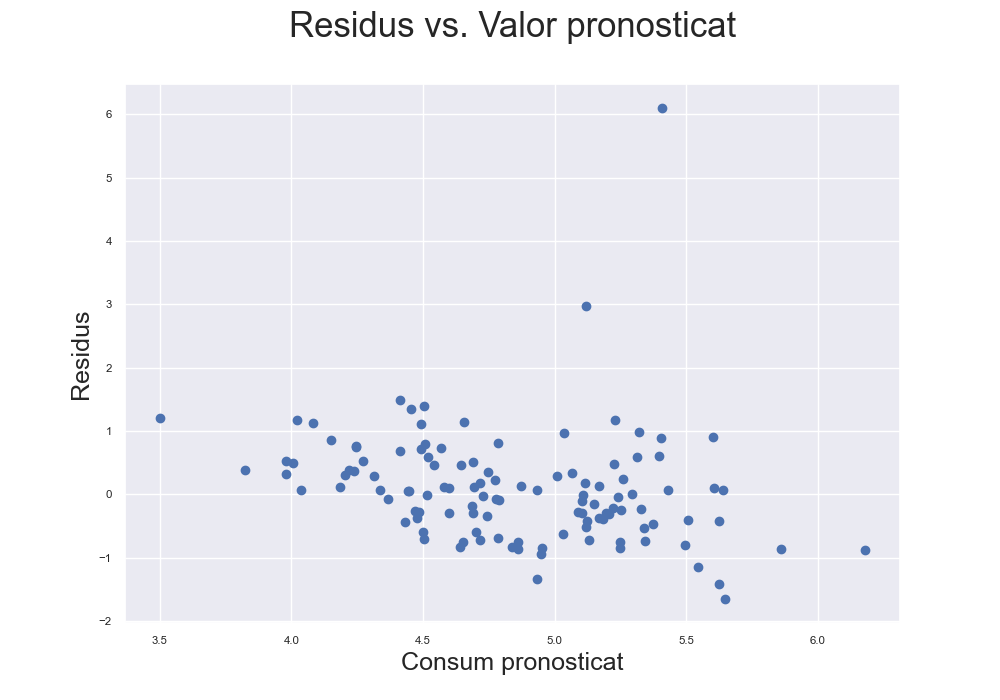

In [300]:
plt.figure(figsize=(10,7))
plt.title("Residus vs. Valor pronosticat\n",fontsize=25)
plt.xlabel("Consum pronosticat",fontsize=18)
plt.ylabel("Residus", fontsize=18)
plt.scatter(x=prediccions,y=y_test-prediccions)

### Quin és el valor del nostre MSE?

In [301]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])

1.0

Per a agilitzar els càlculs es recomana utilitzar la llibreria numpy. Aquesta llibreria ens permet processar vectors sencers a la vegada de manera eficient i en paral·lel. Exemple:

In [302]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector_dist = np.array(X_test['distance']) # convertim llista de python a numpy array
vector_speed = np.array(X_test['speed'])
vector_ti = np.array(X_test['temp_inside'])
vector_to = np.array(X_test['temp_outside'])
vector_AC = np.array(X_test['AC'])
vector_rain = np.array(X_test['rain'])
vector_sun = np.array(X_test['sun'])
vector_pred = prediccions

# podem sumar dos vectors element a element
#print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
#print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
#print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
#vector3 = vector1.copy()
#vector3[vector2 == 1] = 5
#print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)
#
# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE distance: ", mse(vector_dist, vector_pred))
print("\nMSE speed: ", mse(vector_speed, vector_pred))
print("\nMSE temp_inside: ", mse(vector_ti, vector_pred))
print("\nMSE temp_outside: ", mse(vector_to, vector_pred))
print("\nMSE AC: ", mse(vector_AC, vector_pred))
print("\nMSE rain: ", mse(vector_rain, vector_pred))
print("\nMSE sun: ", mse(vector_sun, vector_pred))

MSE distance:  805.5527983887048

MSE speed:  1724.8707565989835

MSE temp_inside:  291.9533648729543

MSE temp_outside:  98.24869158744721

MSE AC:  23.036105911948123

MSE rain:  22.758438964768835

MSE sun:  23.007324225248198


Per a la regressió podeu utilitzar la llibreria sklearn:

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, recordeu que es calcula fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

<img src="images/standarization.png">

Podeu estandarditzar les dades amb les funcions mean i std de numpy i mostrar l'hisotgrama de nou. Recuperant l'exemple de l'apartat anterior:

In [303]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [304]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [305]:
x_t = standarize(X_train)
prediccions_t = lr.predict(x_t)

In [306]:
print("Valor R-squared:",round(metrics.r2_score(y_train,prediccions_t),5))

Valor R-squared: -7.50083


### MSE i R2 Standaritzat

In [181]:
from sklearn.metrics import r2_score
df_noGasT = df.columns.difference(['gas_type'])
df_noGasT = df.drop(['gas_type'], axis=1)
data = df_noGasT.values
x = data[:, :]
y = data[:, 1]

"""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("\nError en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Error en atribut 0: 0.778808
R2 score en atribut 0: 0.020809

Error en atribut 1: 0.000000
R2 score en atribut 1: 1.000000

Error en atribut 2: 0.786374
R2 score en atribut 2: 0.011296

Error en atribut 3: 0.814142
R2 score en atribut 3: -0.023616

Error en atribut 4: 0.711834
R2 score en atribut 4: 0.105014

Error en atribut 5: 0.779394
R2 score en atribut 5: 0.020071

Error en atribut 6: 0.723434
R2 score en atribut 6: 0.090430

Error en atribut 7: 0.818512
R2 score en atribut 7: -0.029111


Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

<IPython.core.display.Javascript object>


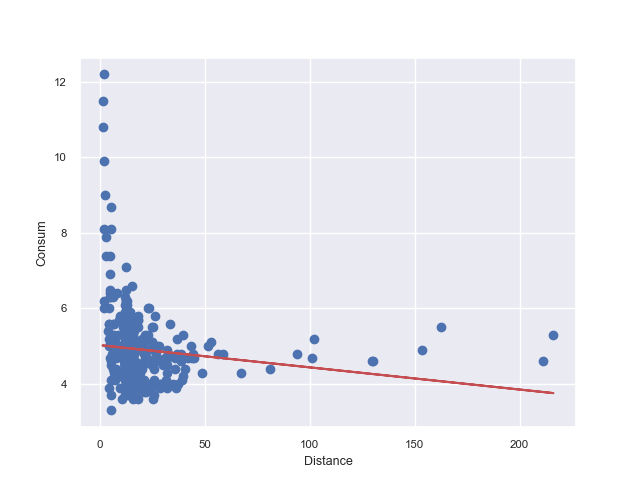

Mean squeared error:  1.0469839006274744
R2 score:  0.016632425139537443


In [182]:
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,0].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("Distance")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


<IPython.core.display.Javascript object>


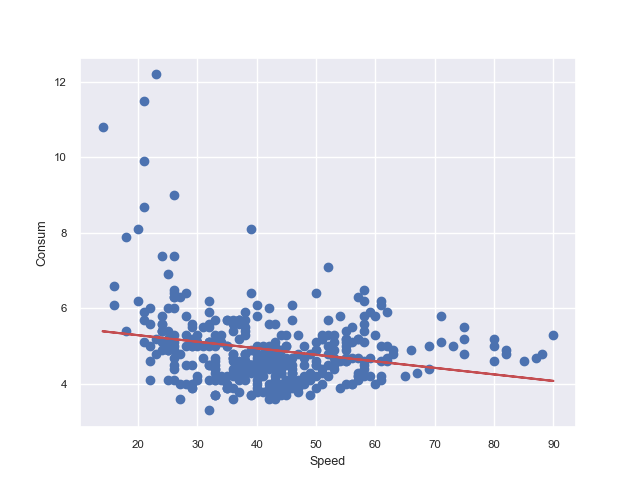

Mean squeared error:  1.0094102986162161
R2 score:  0.051922998248101315


In [183]:
atribut2 = x[:,2].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,2], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("Speed")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


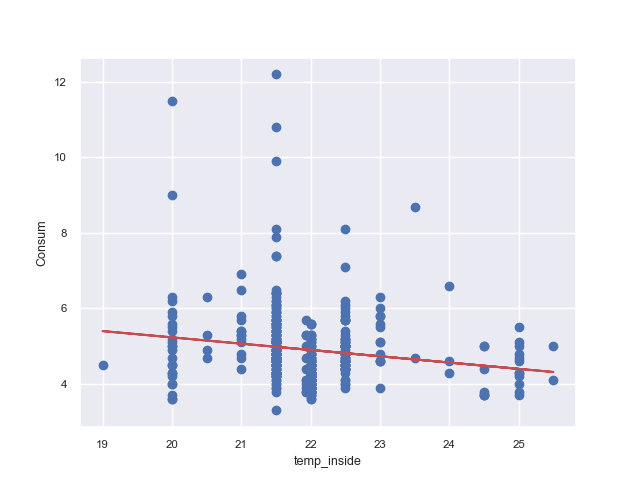

Mean squeared error:  1.0372235636900182
R2 score:  0.02579970923841901


In [184]:
atribut2 = x[:,3].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,3], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("temp_inside")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


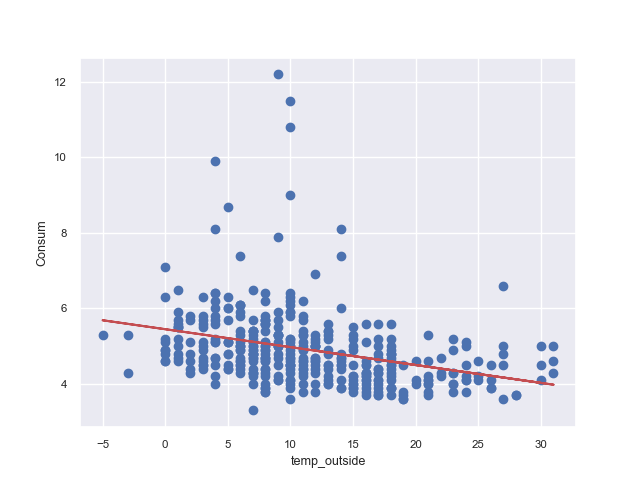

Mean squeared error:  0.9551147859023834
R2 score:  0.1029194334666449


In [185]:
atribut2 = x[:,4].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,4], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("temp_outside")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


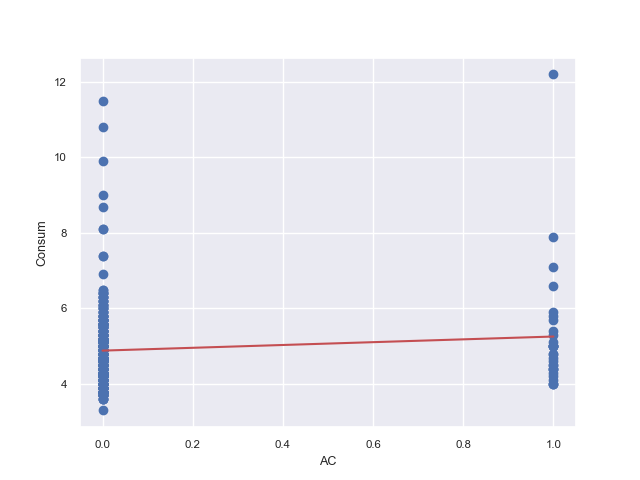

Mean squeared error:  1.0547588454376164
R2 score:  0.009329897738647008


In [186]:
atribut2 = x[:,5].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,5], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("AC")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


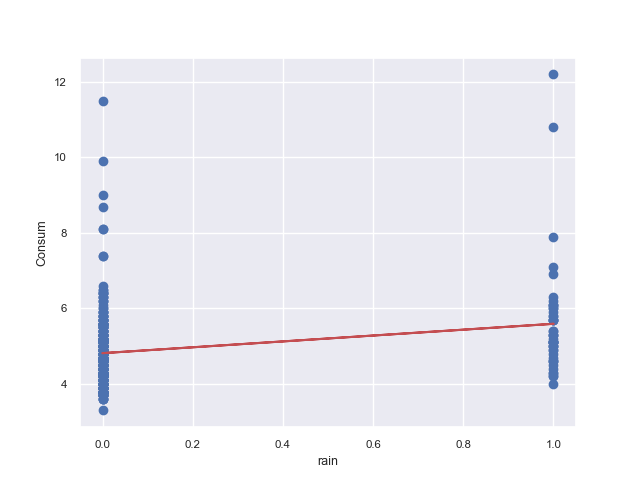

Mean squeared error:  0.9991473051849606
R2 score:  0.06156239667175811


In [187]:
atribut2 = x[:,6].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,6], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("rain")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


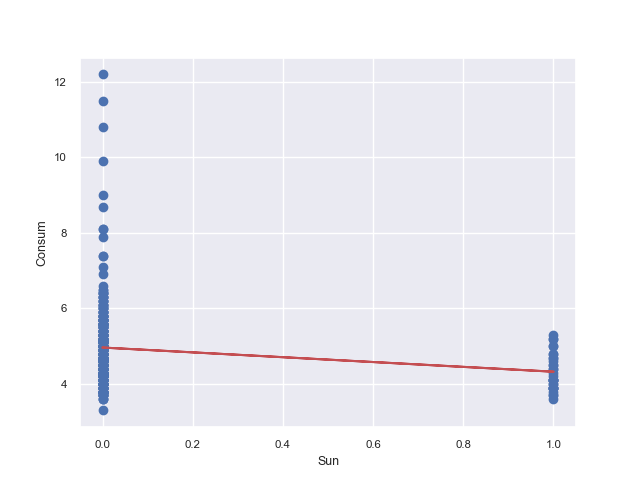

Mean squeared error:  1.0336806440403106
R2 score:  0.0291273557301851


In [188]:
atribut2 = x[:,7].reshape(x.shape[0], 1) 
regr = regression(atribut2, y) 
predicted = regr.predict(atribut2)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,7], y)
plt.plot(atribut2[:,0], predicted, 'r')
plt.ylabel("Consum")
plt.xlabel("Sun")

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

Un cop mostrats de manera adient, (en forma de taula, i/o de gràfics si la dimensionalitat ho permet) els resultats aconseguits amb la regressió, avaluarem de manera independent la idonietat de cadascun dels atributs.

In [190]:
from sklearn.metrics import r2_score
df_noGasT = df.columns.difference(['gas_type'])
df_noGasT = df.drop(['gas_type'], axis=1)
data = df_noGasT.values
x = data[:, :]
y = data[:, 1]
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("\nError en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))
    


Error en atribut 0: 0.819886
R2 score en atribut 0: -0.021088

Error en atribut 1: 0.000000
R2 score en atribut 1: 1.000000

Error en atribut 2: 0.782197
R2 score en atribut 2: 0.025851

Error en atribut 3: 0.861329
R2 score en atribut 3: -0.072701

Error en atribut 4: 0.665492
R2 score en atribut 4: 0.171195

Error en atribut 5: 0.841436
R2 score en atribut 5: -0.047926

Error en atribut 6: 0.796564
R2 score en atribut 6: 0.007958

Error en atribut 7: 0.786921
R2 score en atribut 7: 0.019967


## Normalitzem les dades

### **Normalitzem les dades per a tenir els valors dins del mateix rang**

**Seguim els mateixos passos que en la secció anterior però ara normalitzem les dades en un inici**

In [191]:
from sklearn import preprocessing
df_norm = df.copy(deep = True)
df_norm = df_norm.drop('gas_type', axis=1)
x_norm = df_norm.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_norm)
df_norm = pd.DataFrame(x_scaled, columns=df_norm.columns.values)
print(df_norm.head())

   distance  consume  speed  temp_inside  temp_outside    AC  rain   sun
0     0.124    0.191  0.158        0.385         0.472 0.000 0.000 0.000
1     0.050    0.101  0.211        0.385         0.500 0.000 0.000 0.000
2     0.046    0.247  0.316        0.385         0.556 0.000 0.000 0.000
3     0.054    0.067  0.289        0.385         0.528 0.000 0.000 0.000
4     0.080    0.135  0.421        0.385         0.556 0.000 0.000 0.000


In [192]:
label_columns_norm = list(df_norm.columns)
len_feature_norm = len(label_columns_norm)

X_df_norm = df_norm[label_columns_norm[0:len_feature_norm]]
X_df_norm = X_df_norm.drop('consume', axis=1)
Y_df_norm = df_norm[label_columns_norm[1]]
print("Feature set size:",X_df_norm.shape)
print("Variable set size:",Y_df_norm.shape)

Feature set size: (388, 7)
Variable set size: (388,)


In [193]:
print(X_df_norm.head())
print("\n\n",Y_df_norm.head())

   distance  speed  temp_inside  temp_outside    AC  rain   sun
0     0.124  0.158        0.385         0.472 0.000 0.000 0.000
1     0.050  0.211        0.385         0.500 0.000 0.000 0.000
2     0.046  0.316        0.385         0.556 0.000 0.000 0.000
3     0.054  0.289        0.385         0.528 0.000 0.000 0.000
4     0.080  0.421        0.385         0.556 0.000 0.000 0.000


 0   0.191
1   0.101
2   0.247
3   0.067
4   0.135
Name: consume, dtype: float64


In [194]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_df_norm, Y_df_norm, test_size=0.3, random_state=123)
print("Tamany X training normalitzat:\t",X_train_norm.shape)
print("Tamany X test normalitzat:\t",X_test_norm.shape)
print("Tamany Y training normalitzat:\t",y_train_norm.shape)
print("Tamany Y test normalitzat:\t",y_test_norm.shape)

Tamany X training normalitzat:	 (271, 7)
Tamany X test normalitzat:	 (117, 7)
Tamany Y training normalitzat:	 (271,)
Tamany Y test normalitzat:	 (117,)


**Intercepció i coeficients**

In [195]:
lr.fit(X_train_norm,y_train_norm)
print("Intercepció del model lineal:", lr.intercept_)
print("\nCoeficients del model lineal:", lr.coef_)

Intercepció del model lineal: 0.33457831870476445

Coeficients del model lineal: [ 0.11663891 -0.21090909 -0.05407346 -0.16789995  0.06951817  0.06244887
 -0.01786587]


### Calculem la t-statistic i el Standard Error

In [196]:
cdf_norm = pd.DataFrame(data=lr.coef_, index=X_train_norm.columns, columns=["Coeficients"])
n=X_train_norm.shape[0]
k=X_train_norm.shape[1]
print(range(k))
dfN = n-k
train_pred_norm=lr.predict(X_train_norm)
train_error_norm = np.square(train_pred_norm - y_train_norm)
sum_error=np.sum(train_error_norm)
se=[0,0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train_norm[list(X_train_norm.columns)[i]]-X_train_norm[list(X_train_norm.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf_norm['Standard Error']=se
cdf_norm['t-statistic']=cdf_norm['Coeficients']/cdf_norm['Standard Error']
cdf_norm

range(0, 7)


,Coeficients,Standard Error,t-statistic
distance,0.117,0.061,1.899
speed,-0.211,0.038,-5.566
temp_inside,-0.054,0.040,-1.343
temp_outside,-0.168,0.034,-4.952
AC,0.070,0.024,2.940
rain,0.062,0.019,3.320
sun,-0.018,0.024,-0.755


### **Quin és l'ordre de predicció una vegada normalitzat?**

In [197]:
l_n=list(cdf_norm.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l_n))

rain > 
AC > 
distance > 
sun > 
temp_inside > 
temp_outside > 
speed


### **La R-Squared segueix amb el mateix valor?**

In [198]:
print("Valor R-squared:",round(metrics.r2_score(y_train_norm,train_pred_norm),5))

Valor R-squared: 0.25088


## Estudi R-Squared no binaris

In [199]:
X_df_sinBin = df[label_columns[0:len_feature-3]]
X_df_sinBin = X_df_sinBin.drop('gas_type', axis=1)
X_df_sinBin = X_df_sinBin.drop('consume', axis=1)
Y_df_sinBin = df[label_columns[1]]
print("Feature set size:",X_df_sinBin.shape)
print("Variable set size:",Y_df_sinBin.shape)

Feature set size: (388, 4)
Variable set size: (388,)


In [200]:
X_df_sinBin.head()

,distance,speed,temp_inside,temp_outside
0,28.000,26.000,21.500,12.000
1,12.000,30.000,21.500,13.000
2,11.200,38.000,21.500,15.000
3,12.900,36.000,21.500,14.000
4,18.500,46.000,21.500,15.000


In [201]:
X_train_sinBin, X_test_sinBin, y_train_sinBin, y_test_sinBin = train_test_split(X_df_sinBin, Y_df_sinBin, test_size=0.3, random_state=123)
print("Tamany X training:\t",X_train_sinBin.shape)
print("Tamany X test:\t\t",X_test_sinBin.shape)
print("Tamany Y training:\t",y_train_sinBin.shape)
print("Tamany Y test:\t\t",y_test_sinBin.shape)

Tamany X training:	 (271, 4)
Tamany X test:		 (117, 4)
Tamany Y training:	 (271,)
Tamany Y test:		 (117,)


In [202]:
lr.fit(X_train_sinBin,y_train_sinBin)

cdf_sinBin = pd.DataFrame(data=lr.coef_, index=X_train_sinBin.columns, columns=["Coeficients"])
n=X_train_sinBin.shape[0]
k=X_train_sinBin.shape[1]
print(range(k))
dfN = n-k
train_pred_sinBin=lr.predict(X_train_sinBin)
train_error_sinBin = np.square(train_pred_sinBin - y_train_sinBin)
sum_error=np.sum(train_error_sinBin)
se=[0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train_sinBin[list(X_train_sinBin.columns)[i]]-X_train_sinBin[list(X_train_sinBin.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf_sinBin['Standard Error']=se
cdf_sinBin['t-statistic']=cdf_sinBin['Coeficients']/cdf_sinBin['Standard Error']
cdf_sinBin

range(0, 4)


,Coeficients,Standard Error,t-statistic
distance,0.004,0.003,1.573
speed,-0.025,0.005,-5.508
temp_inside,-0.036,0.057,-0.622
temp_outside,-0.048,0.009,-5.483


In [203]:
print("Valor R-squared:",round(metrics.r2_score(y_train_sinBin,train_pred_sinBin),5))

Valor R-squared: 0.17757


### Estudi amb el millor atribut per a pronosticar el consum (rain)

In [204]:
X_df_lluvia = df[label_columns[7]]
X_df_lluvia = X_df_lluvia.to_numpy()
X_df_lluvia = X_df_lluvia.reshape(-1,1)
Y_df_lluvia = df[label_columns[1]]
print("Feature set size:",X_df_lluvia.shape)
print("Variable set size:",Y_df_lluvia.shape)

Feature set size: (388, 1)
Variable set size: (388,)


### R-Squared lluvia

In [228]:
X_train_lluvia, X_test_lluvia, y_train_lluvia, y_test_lluvia = train_test_split(X_df_lluvia, Y_df_lluvia, test_size=0.3, random_state=123)

lr.fit(X_train_lluvia,y_train_lluvia)

train_pred_lluvia = lr.predict(X_train_lluvia)
prediccions_lluvia = lr.predict(X_test_lluvia)

print("Valor R-squared:",round(metrics.r2_score(y_train_lluvia,train_pred_lluvia),5))

Valor R-squared: 0.08921


<IPython.core.display.Javascript object>


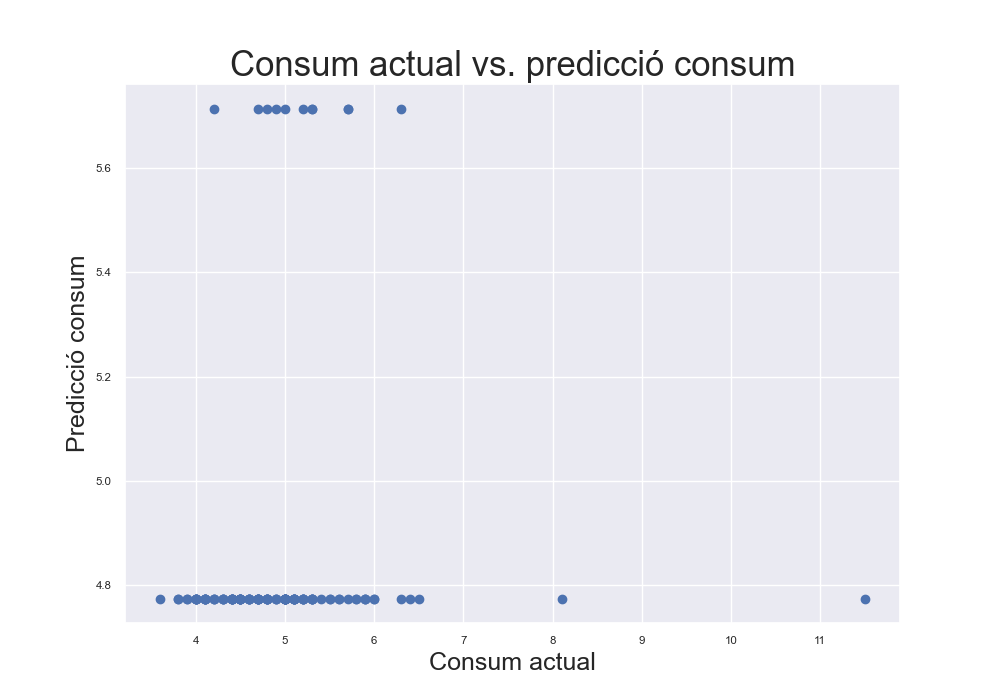

In [206]:
plt.figure(figsize=(10,7))
plt.title("Consum actual vs. predicció consum",fontsize=25)
plt.xlabel("Consum actual",fontsize=18)
plt.ylabel("Predicció consum", fontsize=18)
plt.scatter(x=y_test_lluvia,y=prediccions_lluvia)

<IPython.core.display.Javascript object>


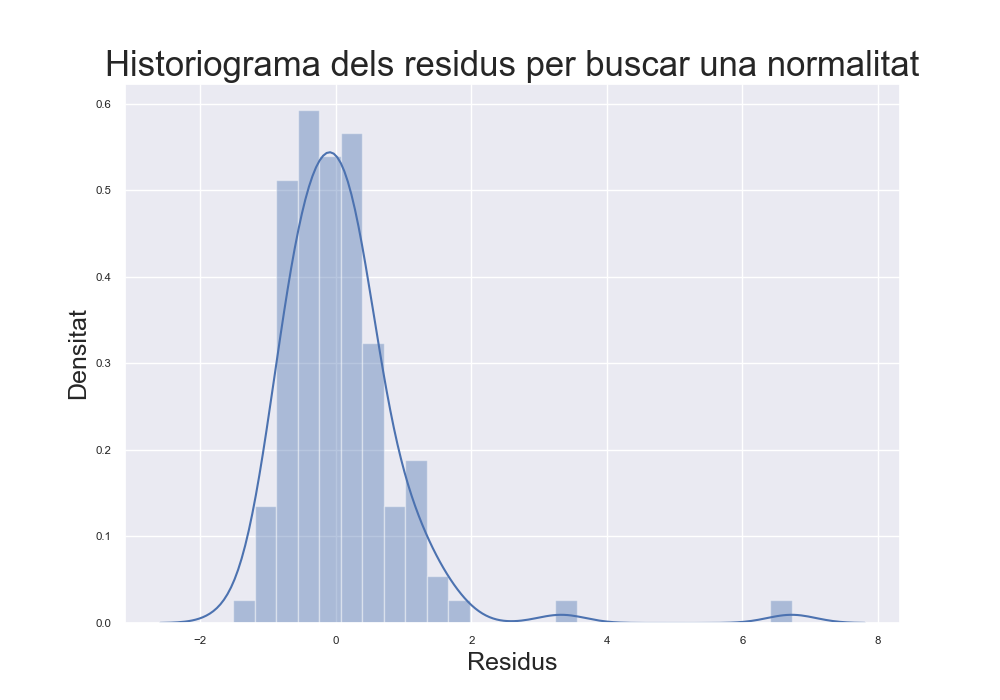

In [207]:
plt.figure(figsize=(10,7))
plt.title("Historiograma dels residus per buscar una normalitat",fontsize=25)
plt.xlabel("Residus",fontsize=18)
plt.ylabel("Densitat", fontsize=18)
ax = sns.distplot([y_test_lluvia-prediccions_lluvia])

<IPython.core.display.Javascript object>


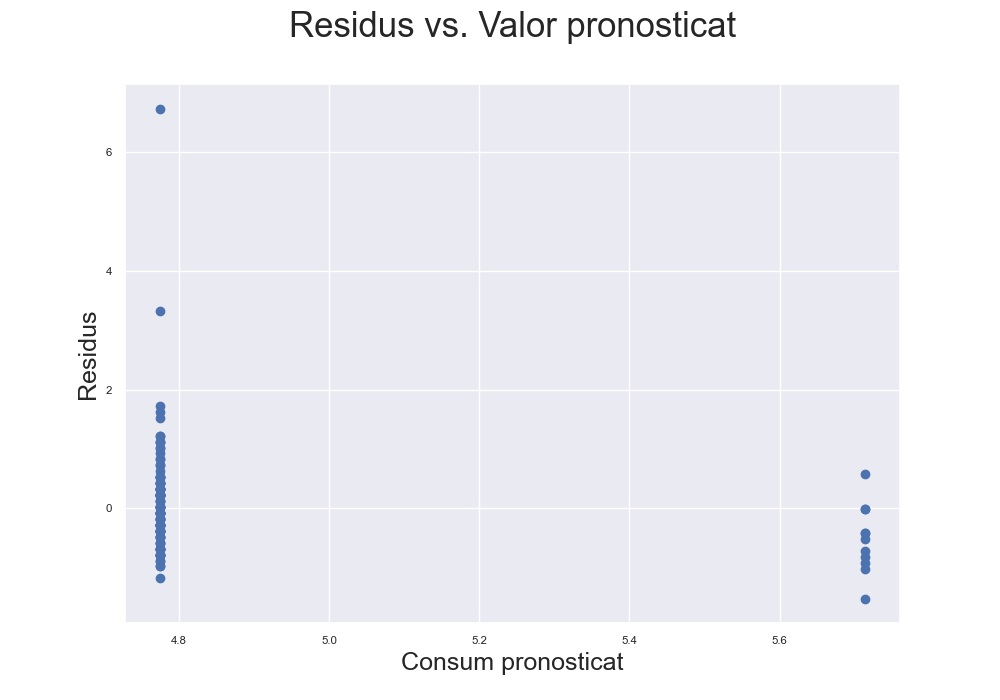

In [208]:
plt.figure(figsize=(10,7))
plt.title("Residus vs. Valor pronosticat\n",fontsize=25)
plt.xlabel("Consum pronosticat",fontsize=18)
plt.ylabel("Residus", fontsize=18)
plt.scatter(x=prediccions_lluvia,y=y_test_lluvia-prediccions_lluvia)

### Estudi amb tots els atributs possibles

In [217]:
df_nans = dataset.copy(deep=True)
df_nans = df_nans.drop(['specials', 'gas_type', 'refill_gas', 'consume'], axis=1)
dataset['refill_liters'] = dataset['refill_liters'].astype(float)
df_nans['distance'] = df_nans['distance'].astype(float)
df_nans = df_nans.replace(np.nan,0)

label_columns_nan = list(df_nans.columns)
len_feature_nan = len(label_columns_nan)

X_df_nans = df_nans[label_columns_nan[0:len_feature_nan]]
Y_df_nans = df[label_columns[1]]

print("Feature set size:",X_df_nans.shape)
print("Variable set size:",Y_df_nans.shape)

Feature set size: (388, 8)
Variable set size: (388,)


In [218]:
X_train_nans, X_test_nans, y_train_nans, y_test_nans = train_test_split(X_df_nans, Y_df_nans, test_size=0.3, random_state=123)

lr.fit(X_train_nans,y_train_nans)

prediccions_nans = lr.predict(X_test_nans)

<IPython.core.display.Javascript object>


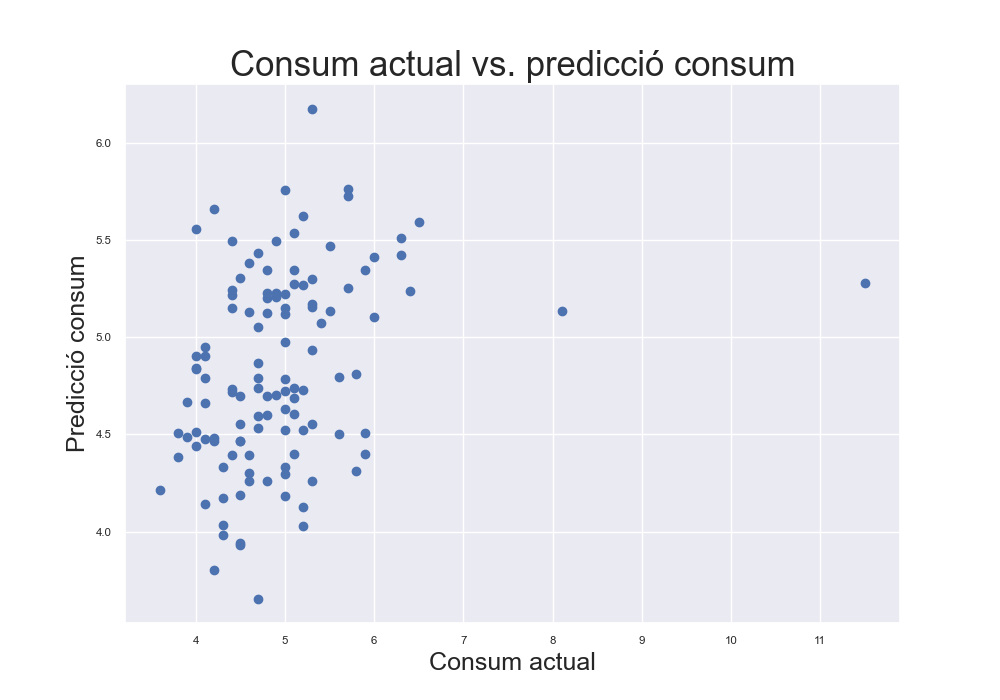

In [219]:
plt.figure(figsize=(10,7))
plt.title("Consum actual vs. predicció consum",fontsize=25)
plt.xlabel("Consum actual",fontsize=18)
plt.ylabel("Predicció consum", fontsize=18)
plt.scatter(x=y_test_nans, y=prediccions_nans)

<IPython.core.display.Javascript object>


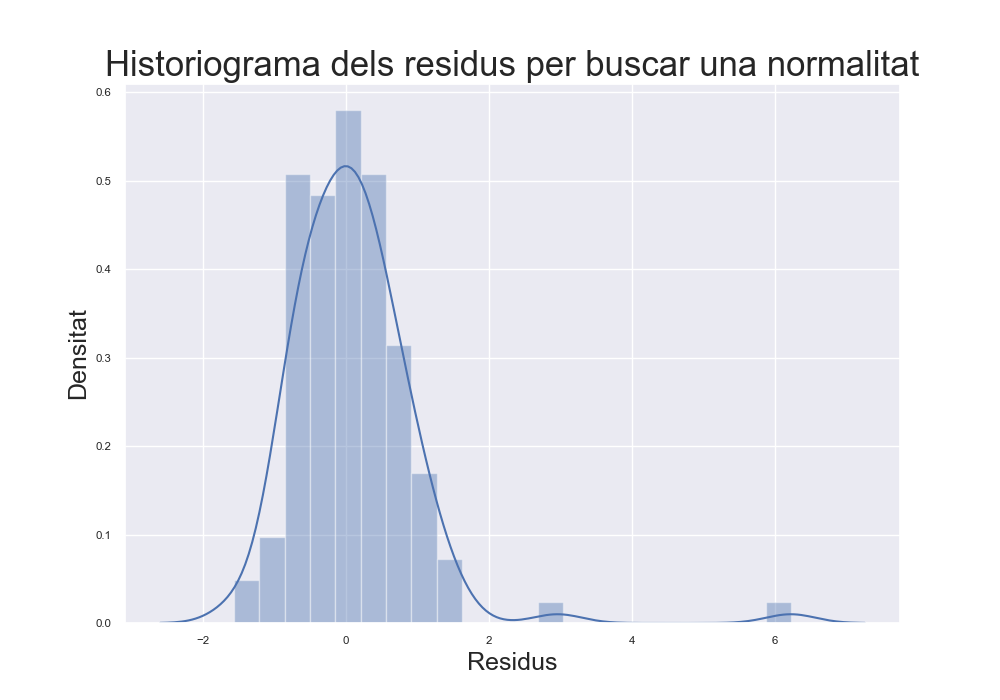

In [220]:
plt.figure(figsize=(10,7))
plt.title("Historiograma dels residus per buscar una normalitat",fontsize=25)
plt.xlabel("Residus",fontsize=18)
plt.ylabel("Densitat", fontsize=18)
ax = sns.distplot([y_test_nans-prediccions_nans])

<IPython.core.display.Javascript object>


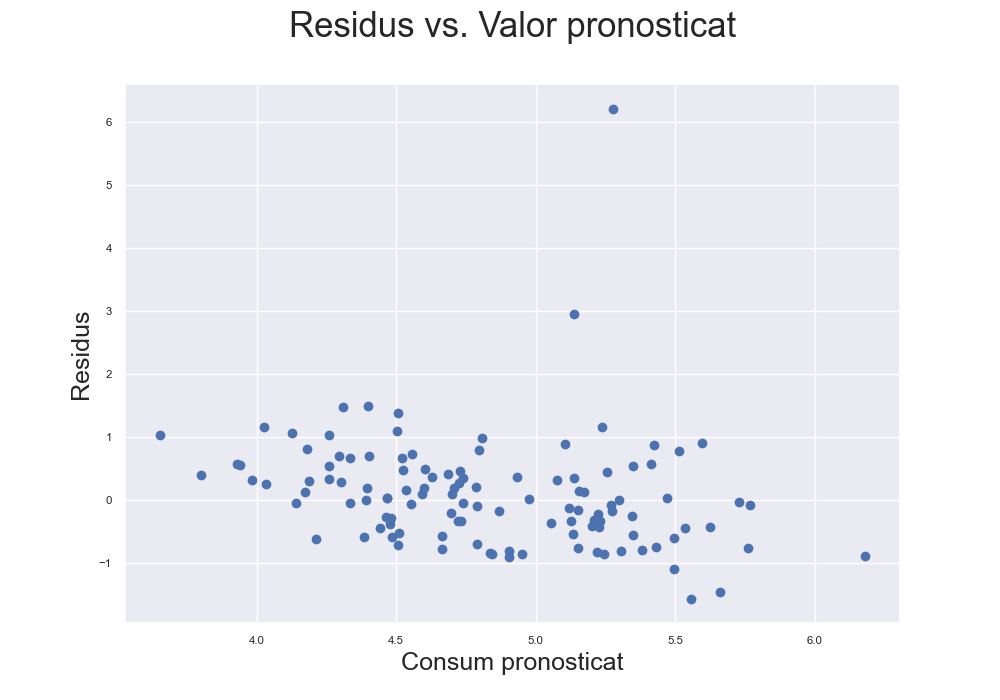

In [221]:
plt.figure(figsize=(10,7))
plt.title("Residus vs. Valor pronosticat\n",fontsize=25)
plt.xlabel("Consum pronosticat",fontsize=18)
plt.ylabel("Residus", fontsize=18)
plt.scatter(x=prediccions_nans,y=y_test_nans-prediccions_nans)

In [222]:
lr.fit(X_train_nans,y_train_nans)
cdf_nans = pd.DataFrame(data=lr.coef_, index=X_train_nans.columns, columns=["Coeficients"])
n=X_train_nans.shape[0]
k=X_train_nans.shape[1]
print(range(k))
dfN = n-k
train_pred_nans=lr.predict(X_train_nans)
train_error_nans = np.square(train_pred_nans - y_train_nans)
sum_error=np.sum(train_error_nans)
se=[0,0,0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train_nans[list(X_train_nans.columns)[i]]- X_train_nans[list(X_train_nans.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf_nans['Standard Error']=se
cdf_nans['t-statistic']=cdf_nans['Coeficients']/cdf_nans['Standard Error']
cdf_nans

range(0, 8)


,Coeficients,Standard Error,t-statistic
distance,0.005,0.003,2.138
speed,-0.025,0.004,-5.682
temp_inside,0.013,0.016,0.795
temp_outside,-0.046,0.008,-5.454
AC,0.510,0.210,2.426
rain,0.588,0.167,3.518
sun,-0.207,0.210,-0.987
refill_liters,-0.016,0.009,-1.808


In [223]:
l_nans=list(cdf_nans.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l_nans))

rain > 
AC > 
distance > 
temp_inside > 
sun > 
refill_liters > 
temp_outside > 
speed


In [224]:
print("Valor R-squared:",round(metrics.r2_score(y_train_nans,train_pred_nans),5))

Valor R-squared: 0.25703


Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?


# Apartat (A): El descens del gradient  

En aquest exercici, es tracta d'implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="images/gradient_descent.png">

Per a la implementació us podeu basar en el següent esquelet:

In [225]:
class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        pass
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

<IPython.core.display.Javascript object>


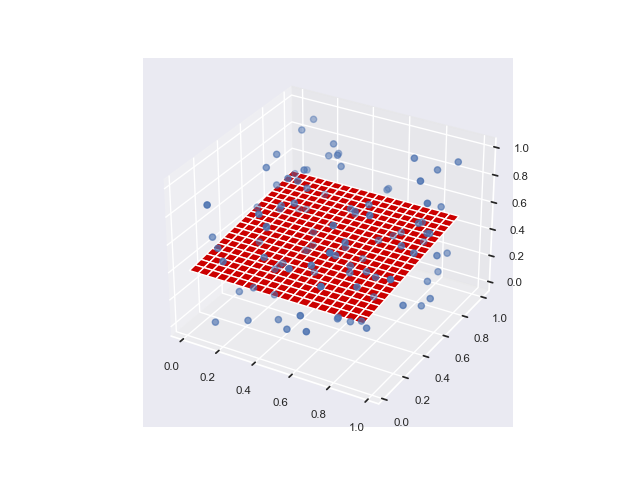

In [226]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.random.random((100, 2))
y_val = np.random.random((100, 1))
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
